In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch
from skimage.segmentation import slic, mark_boundaries
from joblib import Parallel, delayed
import pandas as pd
%matplotlib inline

In [2]:
path = 'Leaf disease'

In [3]:
for folders, _, files in os.walk(path):
    print(folders)

Leaf disease
Leaf disease\Bacterial leaf blight
Leaf disease\Bacterial Leaf blight masks
Leaf disease\Bacterial_leaf_blight_seg
Leaf disease\Brown spot
Leaf disease\Brown spot masks
Leaf disease\Brown_spot_seg
Leaf disease\Leaf smut
Leaf disease\leaf smut masks
Leaf disease\Leaf_smut_seg


In [4]:
for folders in os.listdir(path):
    print(folders)

Bacterial leaf blight
Bacterial Leaf blight masks
Bacterial_leaf_blight_seg
Brown spot
Brown spot masks
Brown_spot_seg
Leaf smut
leaf smut masks
Leaf_smut_seg


In [5]:
image = cv2.imread(path + '\\Brown spot\\DSC_0101.jpg')
mask = cv2.imread(path + '\\Brown spot masks\\DSC_0101.pgm', 0)

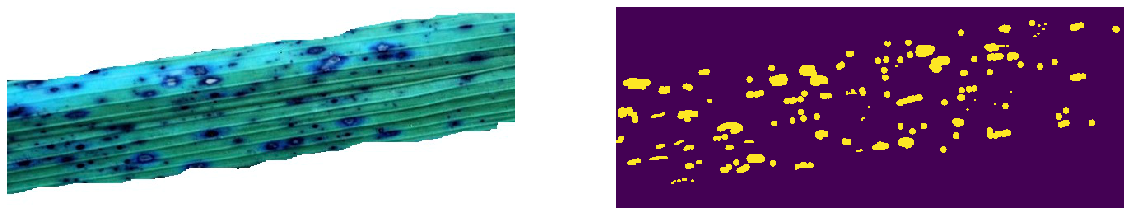

In [6]:
fig, axs = plt.subplots(1,2)

fig.set_figheight(20)
fig.set_figwidth(20)

axs[0].imshow(image)
axs[0].set_axis_off()
axs[1].imshow(mask)
axs[1].set_axis_off()

plt.show()

In [7]:
slic_image = slic(image, 100)

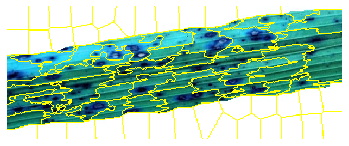

<Figure size 2160x2160 with 0 Axes>

In [8]:
plt.imshow(mark_boundaries(image, slic_image))
plt.axis('off')
plt.figure(figsize=(30, 30))
plt.show()

In [9]:
boundary_seg_image = mark_boundaries(image, slic_image, color=(1,0,0))

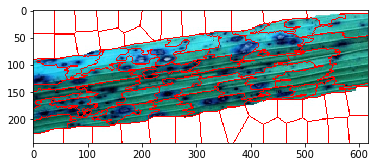

In [10]:
plt.imshow(boundary_seg_image)

In [11]:
boundary_seg_image[0].shape

(617, 3)

In [12]:
boundary_seg_image.shape

(244, 617, 3)

In [13]:
boundary_seg_image[1].shape

(617, 3)

In [14]:
slic_image[0].shape

(617,)

In [15]:
slic_image[1].shape

(617,)

In [16]:
slic_image.shape

(244, 617)

In [17]:
len(slic_image)

244

In [18]:
mask.shape

(244, 617)

In [19]:
np.unique(mask)

array([  0, 255], dtype=uint8)

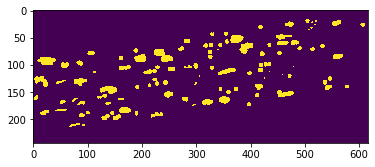

In [20]:
plt.imshow(mask)

In [21]:
%%time
c = 0
for x in tqdm(range(slic_image.shape[0]), total=slic_image.shape[0]):
    for y in range(slic_image.shape[1]):
        if slic_image[x, y] == 1:
            c += 1
        
    

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 244/244 [00:00<00:00, 3706.87it/s]

Wall time: 78.9 ms


In [22]:
masks = []
for i, segVal in enumerate(np.unique(slic_image)):
    mask = np.zeros(slic_image.shape[:2], dtype="uint8")
        
    mask[slic_image.reshape(slic_image.shape[:2]) == segVal] = 255
    masks.append(mask)
    

In [23]:
np.where(mask == 255)

(array([218, 218, 218, ..., 243, 243, 243], dtype=int64),
 array([39, 40, 41, ..., 54, 55, 56], dtype=int64))

In [24]:
np.unique(mask)

array([  0, 255], dtype=uint8)

In [25]:
x_white = np.where(mask == 255)[0]
y_white = np.where(mask == 255)[1]

In [26]:
x_white

array([218, 218, 218, ..., 243, 243, 243], dtype=int64)

In [27]:
y_white

array([39, 40, 41, ..., 54, 55, 56], dtype=int64)

In [28]:
slic_image

array([[ 0,  0,  0, ..., 11, 11, 11],
       [ 0,  0,  0, ..., 11, 11, 11],
       [ 0,  0,  0, ..., 11, 11, 11],
       ...,
       [71, 71, 71, ..., 61, 61, 61],
       [71, 71, 71, ..., 61, 61, 61],
       [71, 71, 71, ..., 61, 61, 61]], dtype=int64)

In [29]:
np.concatenate(slic_image, mask)

TypeError: only integer scalar arrays can be converted to a scalar index